# Video Games Regression Analysis

In this notebook, we will perform regression analysis on a video games dataset. Our goal is to predict the global sales values of games.

## Contents:
1. Data Preparation
2. Data Splitting and Standardization
3. Regression Models
4. Model Performance Comparison
5. Finding Optimal n_neighbors for KNN Regression
6. Final Regression with Best KNN Model

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (14, 8)

## 1. DATA PREPARATION

In [2]:
print("1. DATA PREPARATION")
print("-" * 50)


sampled_data = pd.read_csv('sampled_video_games.csv')
print(f"Dataset size: {sampled_data.shape}")


missing_values = sampled_data.isnull().sum()
print("\nNumber of missing values:")
print(missing_values[missing_values > 0])

1. DATA PREPARATION
--------------------------------------------------
Dataset size: (2000, 16)

Number of missing values:
Year_of_Release      35
Publisher             9
Critic_Score       1001
Critic_Count       1001
User_Score          769
User_Count         1080
Developer           765
Rating              778
dtype: int64


In [3]:

numerical_features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 
                     'Year_of_Release', 'Critic_Score', 'User_Count']

target = 'Global_Sales'

print(f"\nIndependent variables: {numerical_features}")
print(f"Dependent variable: {target}")


Independent variables: ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Year_of_Release', 'Critic_Score', 'User_Count']
Dependent variable: Global_Sales


In [4]:
# Handling missing values
print("\nFilling missing values...")
X = sampled_data[numerical_features].copy()
y = sampled_data[target].copy()

X['Year_of_Release'] = pd.to_numeric(X['Year_of_Release'], errors='coerce')

imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

print("\nData preprocessing completed.")
print(f"X shape: {X.shape}, y shape: {y.shape}")


Filling missing values...

Data preprocessing completed.
X shape: (2000, 7), y shape: (2000,)


## 2. DATA SPLITTING AND STANDARDIZATION

In [5]:
print("\n2. DATA SPLITTING AND STANDARDIZATION")
print("-" * 50)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


2. DATA SPLITTING AND STANDARDIZATION
--------------------------------------------------
Training set size: (1600, 7)
Test set size: (400, 7)


## 3. REGRESSION MODELS

In [6]:
print("\n3. REGRESSION MODELS")
print("-" * 50)


models = {
    'Linear Regression': LinearRegression(),
    'KNN Regression (n=5)': KNeighborsRegressor(n_neighbors=5),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Random Forest Regression': RandomForestRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\nModel: {name}")
    
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'R² Score': r2
    }
    
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")


3. REGRESSION MODELS
--------------------------------------------------

Model: Linear Regression
MSE: 0.0000
RMSE: 0.0055
R² Score: 1.0000

Model: KNN Regression (n=5)
MSE: 1.6975
RMSE: 1.3029
R² Score: 0.7701

Model: Decision Tree Regression
MSE: 0.9211
RMSE: 0.9597
R² Score: 0.8753

Model: Random Forest Regression
MSE: 0.6740
RMSE: 0.8210
R² Score: 0.9087


## 4. MODEL PERFORMANCE COMPARISON


4. MODEL PERFORMANCE COMPARISON
--------------------------------------------------
                               MSE      RMSE  R² Score
Linear Regression         0.000031  0.005541  0.999996
KNN Regression (n=5)      1.697515  1.302887  0.770112
Decision Tree Regression  0.921061  0.959719  0.875264
Random Forest Regression  0.673983  0.820965  0.908725


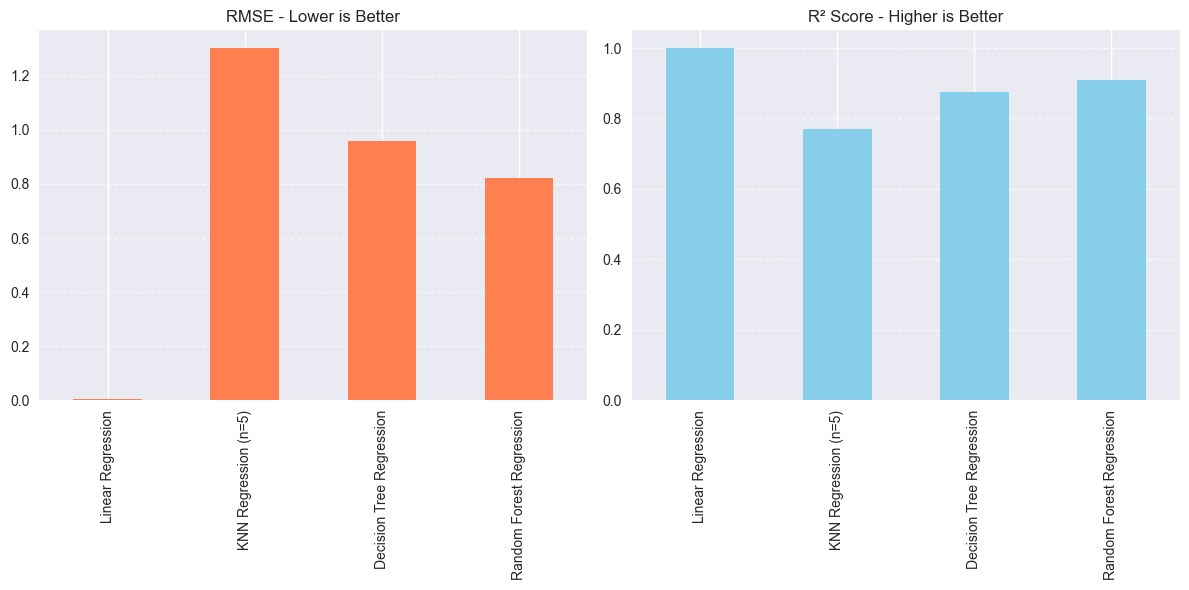

In [7]:
print("\n4. MODEL PERFORMANCE COMPARISON")
print("-" * 50)

results_df = pd.DataFrame(results).T
print(results_df)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
results_df['RMSE'].plot(kind='bar', color='coral')
plt.title('RMSE - Lower is Better')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
results_df['R² Score'].plot(kind='bar', color='skyblue')
plt.title('R² Score - Higher is Better')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('regression_model_comparison.png')
plt.show()

## 5. FINDING OPTIMAL N_NEIGHBORS FOR KNN REGRESSION

In [8]:
print("\n5. FINDING OPTIMAL N_NEIGHBORS FOR KNN REGRESSION")
print("-" * 50)

def find_best_knn_parameter(X_train, y_train, X_test, y_test, k_range):
    """
    Trains KNN regression models for different k values and 
    returns the k value that gives the best R² score.
    """
    best_score = -np.inf
    best_k = None
    scores = []
    
    for k in k_range:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, y_train)
        
        y_pred = knn.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        scores.append(r2)
        
        if r2 > best_score:
            best_score = r2
            best_k = k
            
    return best_k, best_score, scores

k_range = range(1, 51)
best_k, best_score, scores = find_best_knn_parameter(X_train_scaled, y_train, X_test_scaled, y_test, k_range)

print(f"Best n_neighbors value: {best_k}")
print(f"Best R² score: {best_score:.4f}")


5. FINDING OPTIMAL N_NEIGHBORS FOR KNN REGRESSION
--------------------------------------------------
Best n_neighbors value: 1
Best R² score: 0.8328


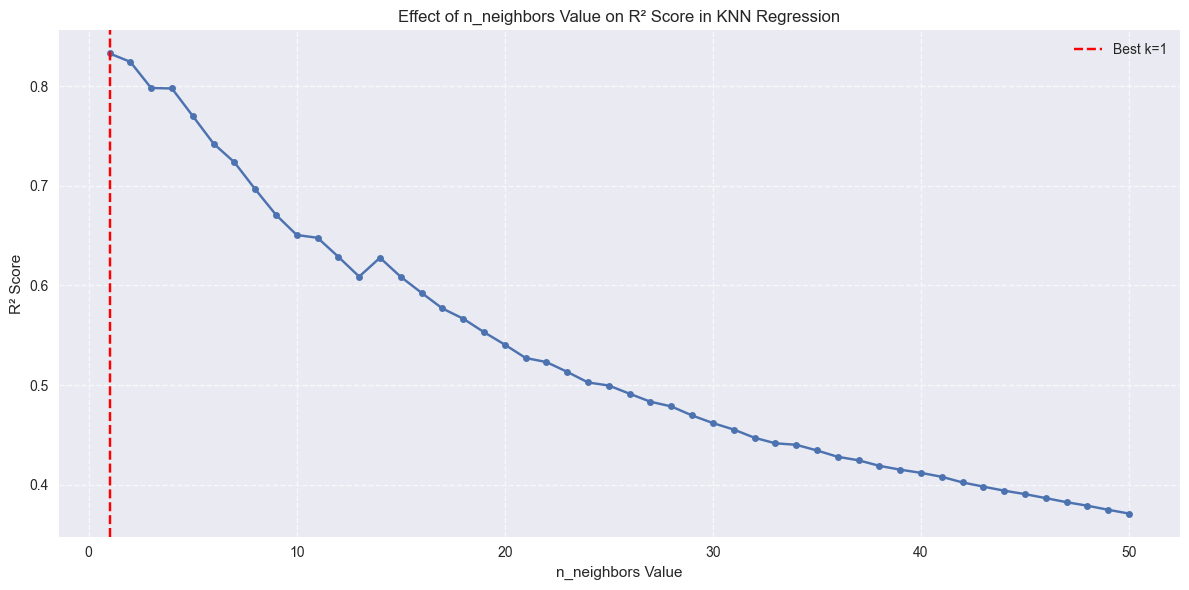

In [9]:

plt.figure(figsize=(12, 6))
plt.plot(k_range, scores, marker='o', linestyle='-', markersize=5)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('n_neighbors Value')
plt.ylabel('R² Score')
plt.title('Effect of n_neighbors Value on R² Score in KNN Regression')
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Best k={best_k}')
plt.legend()
plt.tight_layout()
plt.savefig('knn_parameter_tuning.png')
plt.show()

## 6. FINAL REGRESSION WITH BEST KNN MODEL

In [10]:
print("\n6. FINAL REGRESSION WITH BEST KNN MODEL")
print("-" * 50)

best_knn = KNeighborsRegressor(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)

y_pred = best_knn.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Best KNN model (n_neighbors={best_k}):")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


6. FINAL REGRESSION WITH BEST KNN MODEL
--------------------------------------------------
Best KNN model (n_neighbors=1):
MSE: 1.2344
RMSE: 1.1110
R² Score: 0.8328


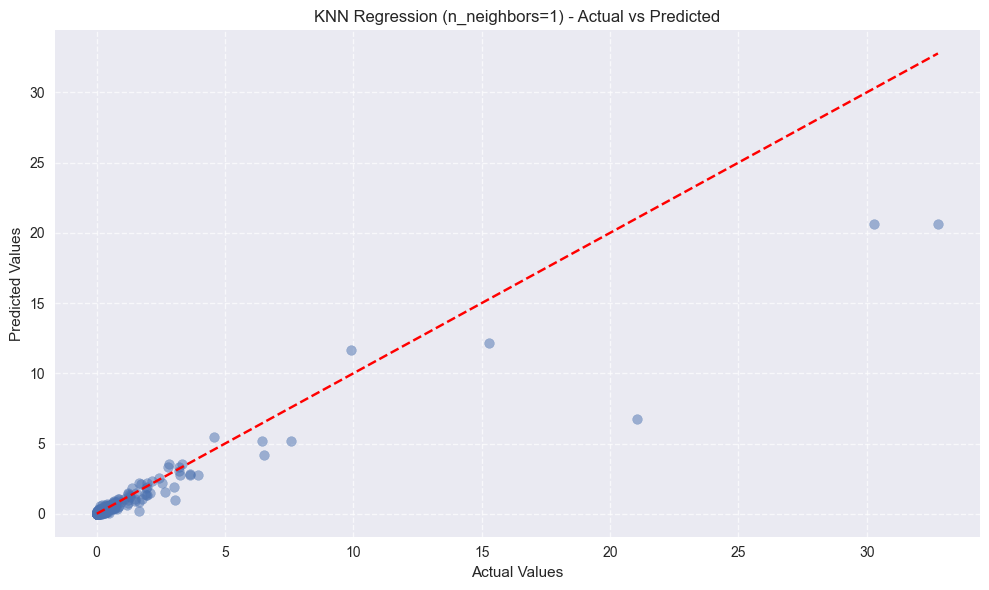


Regression analysis completed! All graphs have been saved as PNG files.


In [11]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'KNN Regression (n_neighbors={best_k}) - Actual vs Predicted')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('best_knn_regression_prediction.png')
plt.show()

print("\nRegression analysis completed! All graphs have been saved as PNG files.")

## Results and Interpretations

In this regression analysis:

1. **Data Preparation**: We selected numerical features from the video games dataset and handled missing values
2. **Model Comparison**: We tested Linear Regression, KNN, Decision Tree, and Random Forest models
3. **Parameter Optimization**: We found the optimal n_neighbors value for KNN
4. **Performance Evaluation**: We compared models using MSE, RMSE, and R² scores

### Key Findings:
- The best performing model and its parameters can be seen in the outputs above
- The effectiveness of different features in predicting Global_Sales can be inferred from model results
- The Actual vs Predicted plot visually shows how successful the model is

### Model Performance Insights:
- **R² Score**: Indicates the proportion of variance in the dependent variable predictable from independent variables
- **RMSE**: Root Mean Square Error provides interpretable error magnitude in the same units as the target variable
- **Parameter Tuning**: The optimal k value for KNN balances bias-variance tradeoff

### Business Applications:
- Game publishers can use these models to predict sales performance
- Investment decisions can be informed by sales predictions
- Marketing strategies can be optimized based on feature importance